## Object Detection with R-CNN (Region Based Convolutional Neural Network)

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2

In [9]:
people_image_path = "image/people.jpg"
car_image_path = "image/car.jpg"

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights = "DEFAULT")
model.eval()

coco_instance_category_name = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [66]:
image = Image.open(people_image_path)

transform = T.Compose([T.ToTensor()])
image = transform(image)

pred = model([image])

get_predicted_label = pred[0]['labels']
label_list = list(get_predicted_label.numpy())

pred_class = [coco_instance_category_name[i] for i in list(pred[0]['labels'].numpy())]
print("Predicted class: ", pred_class)

pred_box = [[(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))] for i in list(pred[0]['boxes'].detach().numpy())]
print("\nPredicted box: ", pred_box)

pred_score = list(pred[0]['scores'].detach().numpy())
print("\nPredicted score: ", pred_score)

threshold = 0.8
pred_threshold = [pred_score.index(x) for x in pred_score if x > threshold][-1]
print("\nThreshold score: ", pred_threshold)

pred_box_threshold = pred_box[: pred_threshold + 1]
print("\nPrediction box threshold: ", pred_box_threshold)

pred_class_threshold = pred_class[: pred_threshold + 1]
print("\nPrediction class threshold: ", pred_class_threshold)

Predicted class:  ['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'handbag', 'person', 'person', 'person', 'clock', 'person', 'person', 'car', 'person', 'person', 'person', 'tie', 'person', 'person', 'person', 'parking meter', 'person', 'handbag', 'clock', 'person', 'car', 'umbrella', 'person']

Predicted box:  [[(0, 319), (441, 1323)], [(765, 351), (1193, 1312)], [(1156, 394), (1569, 1322)], [(1519, 429), (1992, 1330)], [(364, 387), (771, 1306)], [(613, 268), (912, 1241)], [(1439, 336), (1669, 794)], [(1723, 289), (1997, 889)], [(1154, 183), (1456, 705)], [(1600, 197), (1763, 635)], [(882, 190), (1243, 746)], [(546, 241), (717, 541)], [(236, 101), (489, 667)], [(831, 203), (1144, 600)], [(215, 154), (487, 1114)], [(1142, 191), (1536, 973)], [(0, 623), (161, 1244)], [(1576, 208), (1852, 744)], [(258, 333), (622, 1307)], [(896, 358), (1364, 1315)], [(1049, 1065), (1075, 1100)

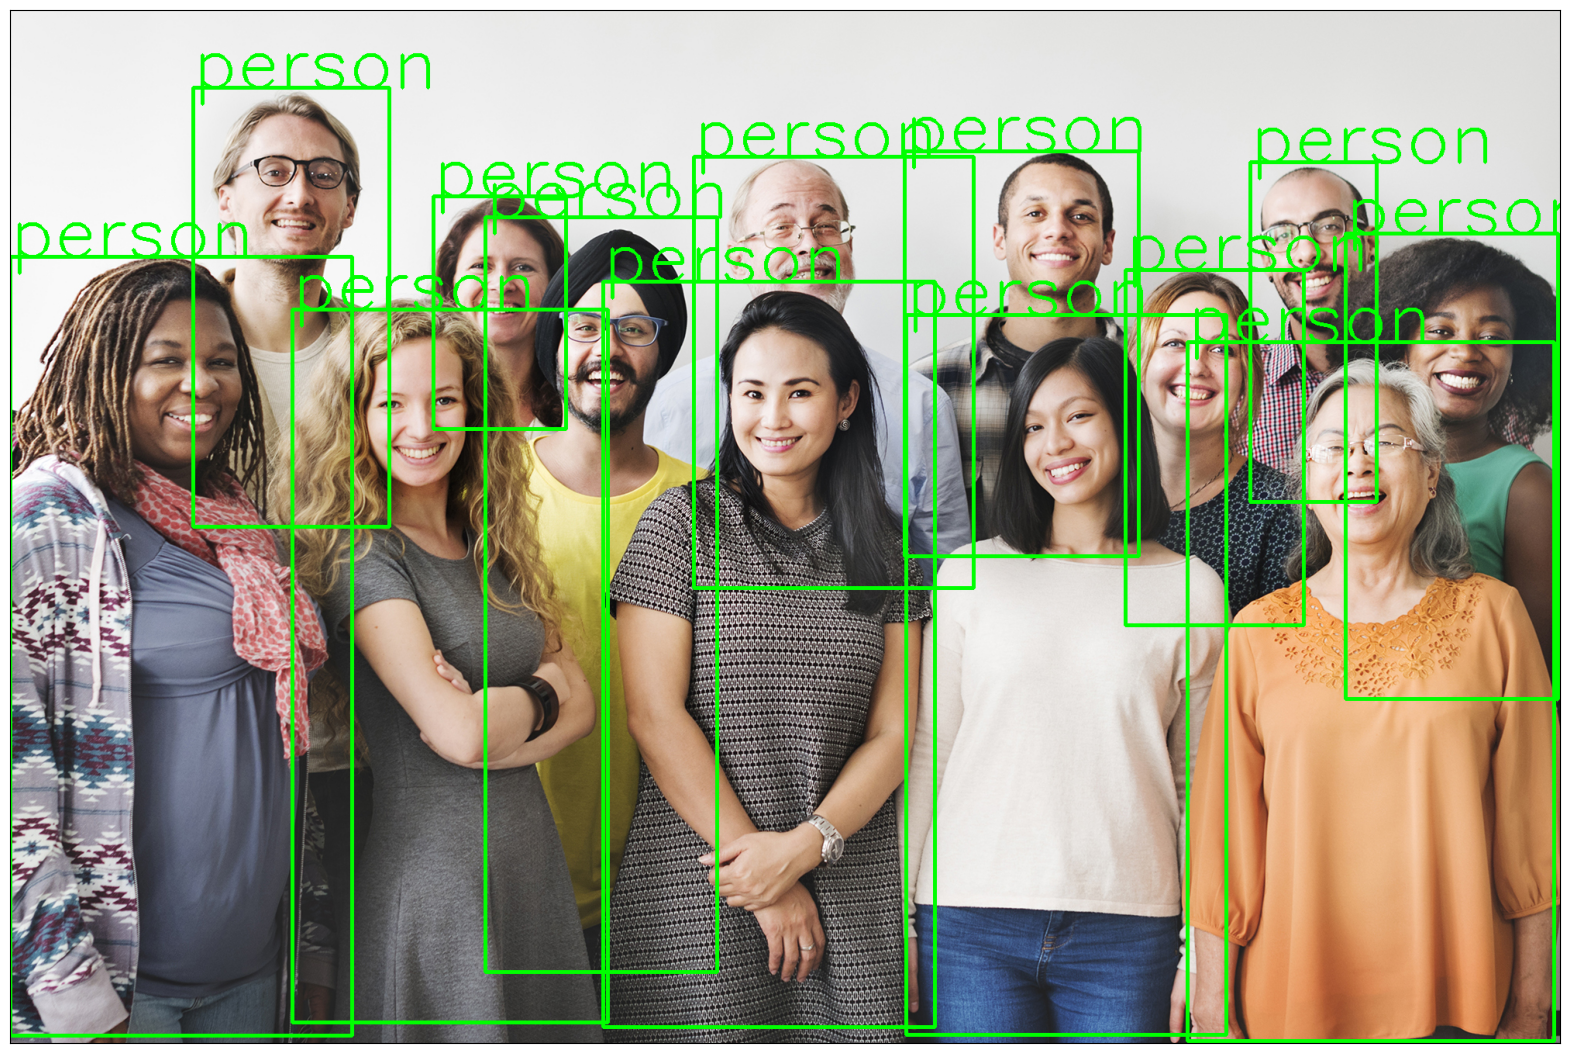

In [81]:
image = cv2.imread(people_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for i in range(len(pred_box_threshold)):
    cv2.rectangle(image, pred_box_threshold[i][0], pred_box_threshold[i][1], 
                  color = (0, 255, 0), thickness = 3)
    cv2.putText(image, pred_class_threshold[i], pred_box_threshold[i][0], cv2.FONT_HERSHEY_SIMPLEX, 
                3, (0, 255, 0), thickness = 3)

plt.figure(figsize = (20, 30))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()